# ЛР 1 — Основные средства работа с временными рядами

***

Кабанов Евгений, РИМ-181226, 9 вариант

## Необходимые библиотеки

In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import h5py
from scipy.stats import skew 
from scipy.stats import kurtosis
%matplotlib inline

Создать ВР, являющийся выборкой случайной величины с нормальным распределением, где данная функция генерирует случайные величины из нормального распределения размером 1х10000.

In [2]:
X = rand.randn(10000)

Создать для него ряд временных отсчетов, где данная функция создает линейный равномерный массив из 10000 элементов в интервале от 3 до 5.

In [3]:
def create_linspace(start, stop, nsamples):
    return np.linspace(start, stop, num = nsamples)

In [4]:
t = create_linspace(3, 5, 10000)

Построить ВР на заданной временной сетке с помощью функций

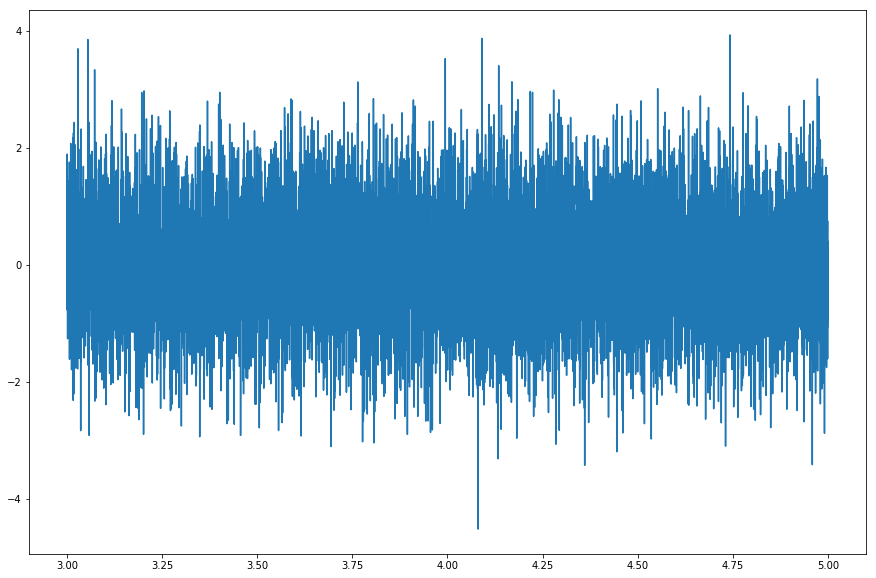

In [6]:
plt.figure(figsize = (15, 10))
plt.plot(t, X)
plt.show()

Найти мат. ожидание данного ВР двумя способами: Во-первых, с помощью функции M = np.mean(X), которая считает среднее значение ряда; Во-вторых, с помощью собственных расчетов на основе формулы (2.7) из лекции 2.

In [14]:
def isEqual(val1, val2, error_digit = 10**-5):
    error = 10**-error_digit
    return abs(val1-val2) < error

In [8]:
M = np.mean(X)

In [9]:
def custom_mean(X): 
    return sum(X) / len(X)

In [10]:
M_custom = custom_mean(X)

In [16]:
isEqual(M, M_custom)

True

Найти дисперсию (variance) данного ВР двумя способами: С помощью функции D = np.var(X) которая считает дисперсию ряда; С помощью собственных расчетов на основе формулы (2.8) из лекции 2.

In [17]:
D = np.var(X)

In [18]:
def custom_varience(X):
    return (1 / (len(X)-1)) * sum((X-M)**2)

In [19]:
D_custom = custom_varience(X)

In [20]:
isEqual(D, D_custom)

True

Найти асимметрию ВР по формуле (2.9). Найти в Python функцию, которая считает ту же самую характеристику, искать по ключевому слову Skewness.

In [21]:
A = skew(X)

In [29]:
def custom_skew(X):
    M = custom_mean(X)
    D = custom_varience(X)
    return np.mean((X-M)**3) / D**(3/2)

In [30]:
A_custom = custom_skew(X)

In [33]:
isEqual(A, A_custom)

True

Найти эксцесс ВР по формуле (2.10). Найти в Python функцию, которая считает ту же самую характеристику, искать по ключевому слову Kurtosis. Сравнить полученные результаты расчетов.

In [34]:
E = kurtosis(X, fisher = False)

In [35]:
def custom_kurtosis(X):
    M = custom_mean(X)
    D = custom_varience(X)
    return np.mean((X-M)**4) / (D**2)

In [36]:
E_custom = custom_kurtosis(X)

In [37]:
isEqual(E, E_custom)

True

Построить оценку выборочной автокорреляции ВР несколькими способами (до 20 лага) и построить ее на графике: С помощью функции plot_acf(X[0:20]) На основе расчетов через функцию np.correlate(x, x, mode = 'full') С помощью собственных расчетов на основе формулы (2.17).

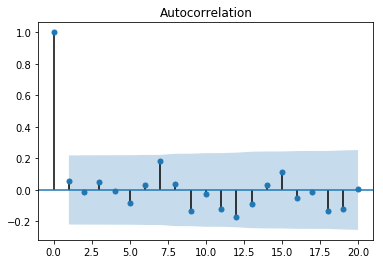

In [38]:
corr_function = plot_acf(X[0:80], lags = 20)

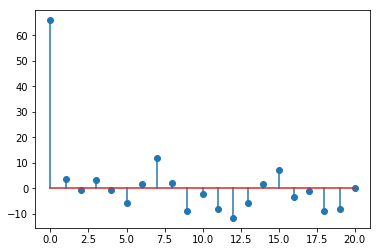

In [40]:
corr_numpy = np.correlate(X[0:80], X[0:80], mode=2)
plt.stem(cor_numpy[79:100])
plt.show()

In [61]:
def custom_corr(X, lags = 0):
    corr = np.ndarray(lags + 1)
    corr[0] = 1
    X1 = X[0:lags*4] # l <= N/4
    for l in range(1,lags + 1):
        corr[l] = (((len(X1)- l) * sum(X1[:-l] * X1[l:]) - sum(X1[:-l])*sum(X1[l:])) / 
                (((len(X1)-l)*sum(X1[:-l]**2) - sum(X1[:-l])**2)**(1/2) *
                 ((len(X1)-l)*sum(X1[l:]**2) - sum(X1[:-l])**2)**(1/2)))
    plt.stem(corr)
    plt.title(f'Корреляция при лаге {lags}')
    plt.show()

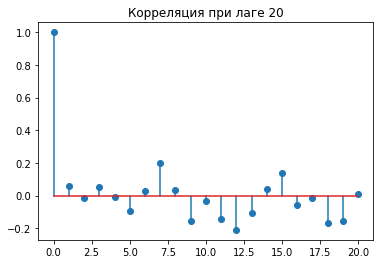

In [65]:
corr_custom = custom_corr(X, 20)

Написать полную функцию, которая имеет один входной параметр – это исходный временной ряд для анализа. Функция должна выполнять все вышеперечисленные перечисленные действия (кроме 1 пункта, конечно же) для того ВР, что был передан ей в качестве параметра. То есть вычислять мат. ожидание, дисперсию, асимметрию, эксцесс и строить АКФ.

In [75]:
def analyse_time_series(X, p = False):
    t = create_linspace(3, 5, X.size)
    plt.plot(t, X)
    plt.title('Исходная функция')
    plt.show()
    M = custom_mean(X)
    D = custom_varience(X)
    A = custom_skew(X)
    E = custom_kurtosis(X)
    print(f'Мат. ожидание: {M}')
    print(f'Дисперсия: {D}')
    print(f'Ассимметрия: {A}')
    print(f'Эксцесс: {E}')
    custom_corr(X, 20)
    if not p:
        return M, D, A, E

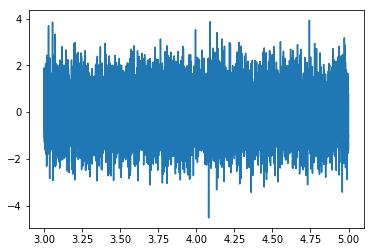

Мат. ожидание: -0.0007434742281093097
Дисперсия: 0.9991811239468773
Ассимметрия: 0.019082644344965368
Эксцесс: 3.041307194137681


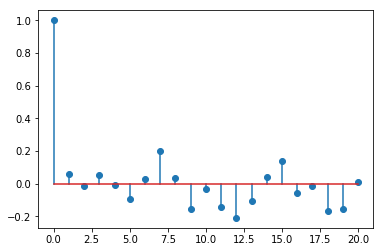

In [57]:
analyse_time_series(X)

Получить у преподавателя mat-файлы, содержащие массивы некоторых ВР, по вариантам. Номер варианта определяется по последним двум цифрам студенческого билета.

In [50]:
variant = 9
resPath = 'LR1_materials/'
fileName = f'{variant}.mat'
columnName = f'z{variant}'

Xmat = h5py.File(resPath + fileName, 'r')
Xmat = Xmat.get(columnName)
Xmat = np.array(Xmat)

Используйте уже написанную функцию (пункт 11) от этого ВР для того, чтобы получить все его базовые характеристики

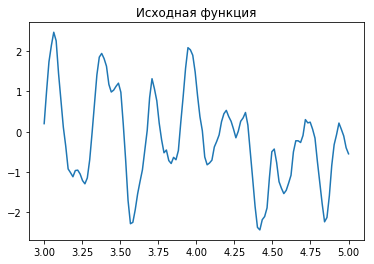

Мат. ожидание: [-0.17740255]
Дисперсия: [1.33323655]
Ассимметрия: [0.18671969]
Эксцесс: [2.36486713]


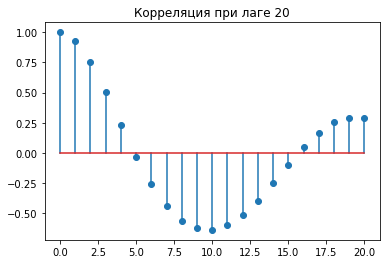

In [78]:
analyse_time_series(Xmat, p=True)